In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import pickle
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import pickle
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

In [3]:
# Getting path of folders and their images
path_to_images = 'H:\FINAL PROJECT DATASET\Dataset'

img_folders = []
for entry in os.scandir(path_to_images):
    if entry.is_dir():
        img_folders.append(entry.path)
img_folders

['H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented',
 'H:\\FINAL PROJECT DATASET\\Dataset\\Moderate_Demented',
 'H:\\FINAL PROJECT DATASET\\Dataset\\Non_Demented',
 'H:\\FINAL PROJECT DATASET\\Dataset\\Very_Mild_Demented']

In [4]:
# Creating a dictionary of images and their labels from each folder path

img_dict = {}
for folder in img_folders:
    img_dict[folder] = []
    for entry in os.scandir(folder):
        if entry.is_file():
            img_dict[folder].append(entry.path)
img_dict

{'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented': ['H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_10.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_100.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_101.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_102.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_103.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_104.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_105.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_106.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_107.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_108.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_109.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_11.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mi

In [5]:
# Creating a dataframe of images and their labels

img_df = pd.DataFrame(columns=["image", "label"])
for folder in img_dict:
    for img in img_dict[folder]:
        img_df = img_df.append({"image": img, "label": folder.split("\\")[-1]}, ignore_index=True)
img_df

C:\Users\hp\AppData\Local\Temp\ipykernel_7468\753985834.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_df = img_df.append({"image": img, "label": folder.split("\\")[-1]}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7468\753985834.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_df = img_df.append({"image": img, "label": folder.split("\\")[-1]}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7468\753985834.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_df = img_df.append({"image": img, "label": folder.split("\\")[-1]}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7468\753985834.py:6: FutureWarning: The frame.append method is deprecated and will be removed f

,image,label
0,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
1,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
2,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
3,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
4,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
...,...,...
6395,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
6396,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
6397,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
6398,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented


In [6]:
# Shuffling the dataframe

img_df = shuffle(img_df)
img_df

,image,label
2778,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
2582,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
1494,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
283,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
2321,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
...,...,...
3273,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
1089,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
5437,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
2737,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented


In [7]:
#Encoding the labels

encode_map = {"Non_Demented" : 0, "Very_Mild_Demented" : 1, "Mild_Demented" : 2, "Moderate_Demented" : 3}
img_df["label"] = img_df["label"].map(encode_map)
img_df

,image,label
2778,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
2582,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
1494,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
283,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,2
2321,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
...,...,...
3273,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
1089,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
5437,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,1
2737,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0


In [8]:
# Creating X and y by reading images and their labels

X = []
y = []

for img_path, label in zip(img_df["image"].values, img_df["label"].values):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append(label)
X = np.array(X)
y = np.array(y)

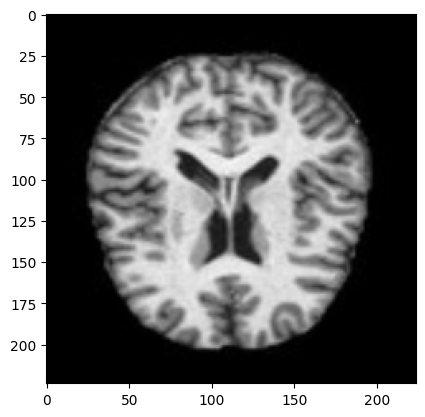

In [9]:
plt.imshow(X[0])

In [10]:
X.shape, y.shape

((6400, 224, 224, 3), (6400,))

In [11]:
img_df.isna().sum()

image    0
label    0
dtype: int64

In [12]:
# Splitting the data into train, validation and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [13]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
# Train the model
history=model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))


Epoch 1/80
96/96 [==============================] - 327s 3s/step - loss: 25.5373 - accuracy: 0.4772 - val_loss: 1.0254 - val_accuracy: 0.5098
Epoch 2/80
96/96 [==============================] - 311s 3s/step - loss: 1.0345 - accuracy: 0.4945 - val_loss: 1.0042 - val_accuracy: 0.5027
Epoch 3/80
96/96 [==============================] - 309s 3s/step - loss: 0.9956 - accuracy: 0.5228 - val_loss: 0.9688 - val_accuracy: 0.5258
Epoch 4/80
96/96 [==============================] - 311s 3s/step - loss: 0.9734 - accuracy: 0.5384 - val_loss: 0.9939 - val_accuracy: 0.5180
Epoch 5/80
96/96 [==============================] - 313s 3s/step - loss: 0.9304 - accuracy: 0.5674 - val_loss: 0.9322 - val_accuracy: 0.5598
Epoch 6/80
96/96 [==============================] - 309s 3s/step - loss: 0.9131 - accuracy: 0.5876 - val_loss: 0.9234 - val_accuracy: 0.5684
Epoch 7/80
96/96 [==============================] - 311s 3s/step - loss: 0.8887 - accuracy: 0.5986 - val_loss: 0.9256 - val_accuracy: 0.5734
Epoch 8/80
9

In [22]:
# Extract features from the last convolutional layer
cnn_features_train = model.predict(X_train)
cnn_features_test = model.predict(X_test)


80/80 [==============================] - 47s 582ms/step


In [23]:
# SVM classifier
svm_classifier = SVC(kernel='rbf', C=1)
svm_classifier.fit(cnn_features_train, y_train)


SVC(C=1)

In [24]:
# Make predictions
y_pred = svm_classifier.predict(cnn_features_test)


In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)


In [26]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f"Recall: {recall}")
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8457
Precision: 0.8456
F1 Score: 0.8443
Recall: 0.845703125
Confusion Matrix:
[[1153  104   23    0]
 [ 120  737   39    0]
 [  49   46  263    0]
 [   2    9    3   12]]


In [27]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


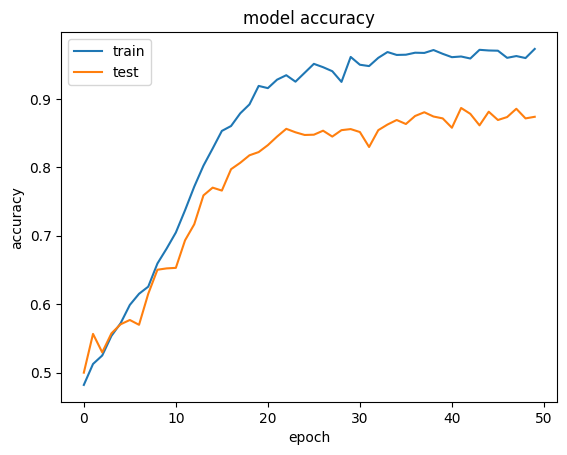

In [51]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

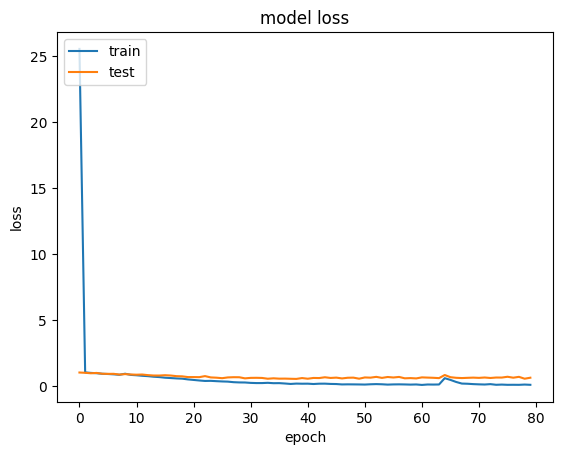

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()